# Johan Knarreborg 

## Research question/interests

Who is the best driver overall...?

In [1]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
from analysis1_pipeline import pipeline

#running my pipeline function
pipeline("../data/raw/","../data/processed/Johan_Processed/")

#Importing the raw data and substituing the '\N' values for NaN. 
circuits = pd.read_csv("../data/processed/Johan_Processed/circuits.csv")
drivers = pd.read_csv("../data/processed/Johan_Processed/drivers.csv")
results = pd.read_csv("../data/processed/Johan_Processed/results.csv")
seasons = pd.read_csv("../data/processed/Johan_Processed/seasons.csv")
status = pd.read_csv("../data/processed/Johan_Processed/status.csv")
lap_times = pd.read_csv("../data/processed/Johan_Processed/lap_times.csv")
pit_stops = pd.read_csv("../data/processed/Johan_Processed/pit_stops.csv")
qualifying = pd.read_csv("../data/processed/Johan_Processed/qualifying.csv")
races = pd.read_csv("../data/processed/Johan_Processed/races.csv")
constructors = pd.read_csv("../data/processed/Johan_Processed/constructors.csv")
constructor_results = pd.read_csv("../data/processed/Johan_Processed/constructor_results.csv")
constructor_standings = pd.read_csv("../data/processed/Johan_Processed/constructor_standings.csv")
driver_standings = pd.read_csv("../data/processed/Johan_Processed/driver_standings.csv")

#cleaning the data
#Since we are going to use the results df and the races df together we are going to merge them together using ther raceId and exclude any unnecessary columns. 
results_races = pd.merge(results,races,on="raceId",how="left")
results_races = results_races.drop(["url","time_y"],axis=1)
    


# Explanatory Data Analysis

To get some inseights into the data we will look at the following parts of the data: 

    - The average finish time for each season 
    
    - The number of different circuits in each season 
    
    - 

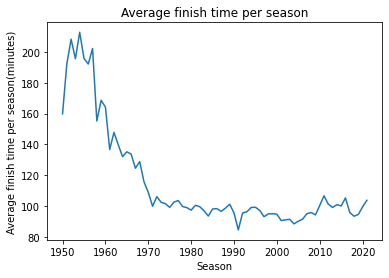

In [20]:
#Finding the average times per season
season = results_races[["year","milliseconds"]].copy()
season = season.groupby("year").mean().reset_index()
season["minutes"]= season["milliseconds"]/(1000*60)
plt.plot(season["year"],season["minutes"])
plt.title("Average finish time per season")
plt.xlabel("Season")
plt.ylabel("Average finish time per season(minutes)")
plt.show()

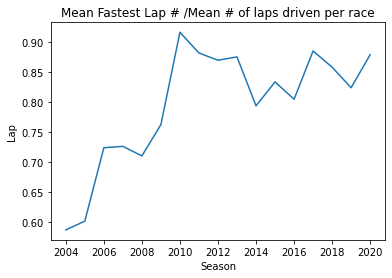

In [66]:
#For the fastest lap there is only data from 2004 and onwards 
#We find the mean fastest lap for each season devided by the mean number of laps driven each season. 

#Going through each season and finding the average time for all the cars that finish the race 
mean_lap=[[],[]]
for i in range(1950,2021): 
    season = results_races[results_races["year"]==i]
    mean = season["fastestLap"].mean()/season["laps"].mean()
    mean_lap[0].append(i)
    mean_lap[1].append(mean)
plt.plot(mean_lap[0],mean_lap[1])
plt.title("Mean Fastest Lap # /Mean # of laps driven per race")
plt.xlabel("Season")
plt.ylabel("Lap")
plt.show()


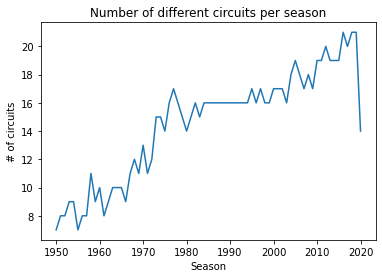

In [48]:
#Number of circuits per season 
year_season =[[],[]]
for i in range(1950,2021): 
    season = results_races[results_races["year"]==i]
    n = season.circuitId.unique()
    year_season[0].append(i)
    year_season[1].append(len(n))
plt.plot(year_season[0],year_season[1])
plt.title("Number of different circuits per season")
plt.xlabel("Season")
plt.ylabel("# of circuits")
plt.show()


In [117]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421
